In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#------------------Helper Functions------------------#

In [3]:
# output metrics
def get_scores(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    return (y_pred, 
            np.sqrt(mean_squared_error(ytest, y_pred)), 
            r2_score(ytest, y_pred),
            model.__class__.__name__)

In [4]:
# plot the comparison between test and prediction
def metrics_plot(y1, y2):
    plt.figure(figsize=(6,6))
    plt.plot(y1, y2, 'bo')
    plt.plot([100,1500], [100,1500], color='black', linewidth=2.0, linestyle='-')
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.xlim((100,1500))
    plt.ylim((100,1500))
        
    my_x_ticks = np.arange(100,1600,200)
    my_y_ticks = np.arange(100, 1600, 200)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.axis('scaled')
    
    plt.show()

In [5]:
def plot_coefs(comparing_models):
    y1 = comparing_models['Linear']
    y2 = comparing_models['Ridge']
    y3 = comparing_models['Lasso']

    xx = np.arange(1, len(y1)+1, 1)

    plt.figure(figsize=(14, 6))
    plt.plot(xx, y1, label="Linear Regression")
    plt.plot(xx, y2, label="Ridge Regression")
    plt.plot(xx, y3, label="Lasso Regression")

    plt.xticks(xx, X.columns, rotation=90)
    #plt.vlines(xx, 0, y1, linestyle="dashed")

    #plt.axhline(0, color='r', linestyle='solid')
    plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
    plt.ylabel("coefficients")
    plt.xlabel("features")
    plt.legend()
    plt.show()

In [6]:
#------------------Load Data------------------#

In [7]:
# read date from csv file
data = pd.read_csv('fatigue_data.csv', index_col='Sl. No.')

# delete extra columns
xx = data.drop(data.columns[17:20], axis=1)
xx.head()

,NT,THT,THt2,THQCr,CT,Ct3,DT,Dt4,QmT,TT,Tt5,TCr,C,Ni,Cr,Mo,Fatigue
Sl. No.,,,,,,,,,,,,,,,,,
1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,232
2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.08,0.12,0.0,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.02,0.03,0.0,235
4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,241
5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.01,0.02,0.0,225


In [8]:
# set X as columns C, Ni, Cr and Mo (No.16-19)
X = data.drop(data.columns[16:20], axis=1) 
# set y as 'Fatigue' column (No.17)
y = data['Fatigue']

# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [9]:
#------------------Models, Predictions & Metrics------------------#

In [10]:
#simple linear regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr, rmse_lr, r2_lr, lr_name = get_scores(lr, X_test, y_test)

#ridge regression
ridge = Ridge(alpha=0.08, random_state=0).fit(X_train, y_train)
y_pred_rg, rmse_rg, r2_rg, rg_name = get_scores(ridge, X_test, y_test)

#lasso regression
lasso = Lasso(alpha=0.5,random_state=0).fit(X_train, y_train)
y_pred_ls, rmse_ls, r2_ls, ls_name = get_scores(lasso, X_test, y_test)

#elasticnet regression
en = ElasticNet(alpha=0.03,random_state=0).fit(X_train, y_train)
y_pred_en, rmse_en, r2_en, en_name = get_scores(en, X_test, y_test)


print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(lr_name, rmse_lr, r2_lr))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(rg_name, rmse_rg, r2_rg))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(ls_name, rmse_ls, r2_ls))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(en_name, rmse_en, r2_en))


LinearRegression model
 RMSE =  30.48898, R2 =  0.97417

Ridge model
 RMSE =  30.69286, R2 =  0.97383

Lasso model
 RMSE =  33.31803, R2 =  0.96916

ElasticNet model
 RMSE =  33.03186, R2 =  0.96969



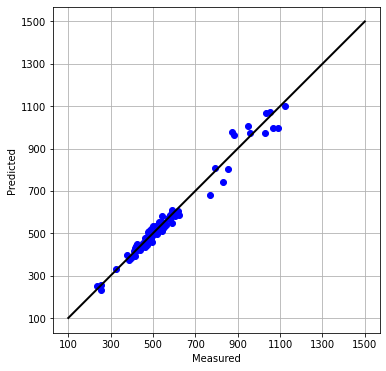

In [11]:
metrics_plot(y_test, y_pred_rg)

In [12]:
#------------------Coefficient Analysis------------------#

In [13]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'Linear': lr.coef_,     #simple linear regression coefficients
                                 'Ridge': ridge.coef_,   #ridge regression coefficients
                                 'Lasso':  lasso.coef_}, #lasso regression coefficients
                                  index=X.columns)
comparing_models

,Linear,Ridge,Lasso
NT,-0.747984,-1.828352,-2.941816
THT,1.824804,2.022784,0.311313
THt2,-5.004603,-5.800393,-15.700353
THQCr,-3.733545,-5.027690,-6.310932
CT,3.169851,3.309116,0.659260
Ct3,0.087265,0.083988,0.115376
DT,-1.010624,-0.880516,-0.249088
Dt4,0.302987,0.285078,-0.636238
QmT,-0.372412,-0.381909,-0.413506
TT,-0.951018,-0.960269,-1.013657


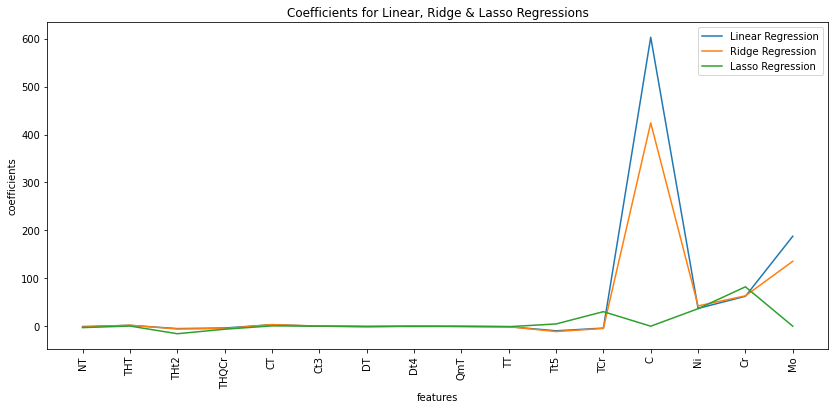

In [14]:
plot_coefs(comparing_models)

In [15]:
#------------------Models With Feature Scaling------------------#

In [16]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

#models 
#simple linear regression
lr = LinearRegression().fit(X_train_std, y_train)
y_pred_lr, rmse_lr, r2_lr, lr_name = get_scores(lr, X_test_std, y_test)

#ridge regression
ridge = Ridge(alpha=0.008, random_state=0).fit(X_train_std, y_train)
y_pred_rg, rmse_rg, r2_rg, rg_name = get_scores(ridge, X_test_std, y_test)

#lasso regression
lasso = Lasso(alpha=0.5,random_state=0).fit(X_train_std, y_train)
y_pred_ls, rmse_ls, r2_ls, ls_name = get_scores(lasso, X_test_std, y_test)

#elasticnet regression
en = ElasticNet(alpha=0.001,random_state=0).fit(X_train_std, y_train)
y_pred_en, rmse_en, r2_en, en_name = get_scores(en, X_test_std, y_test)


print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(lr_name, rmse_lr, r2_lr))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(rg_name, rmse_rg, r2_rg))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(ls_name, rmse_ls, r2_ls))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(en_name, rmse_en, r2_en))

LinearRegression model
 RMSE =  35.08988, R2 =  0.96579

Ridge model
 RMSE =  34.77500, R2 =  0.96640

Lasso model
 RMSE =  35.66206, R2 =  0.96467

ElasticNet model
 RMSE =  33.24037, R2 =  0.96930



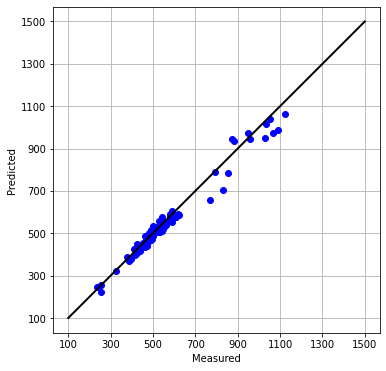

In [17]:
metrics_plot(y_test, y_pred_en)